<a href="https://colab.research.google.com/github/GodaBac/BachelorThesis/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
from datetime import datetime

input_file_path = '/content/drive/MyDrive/Bakalauras/duomenys.csv'

with open(input_file_path, 'r') as input_file:
    reader = csv.reader(input_file)
    value_names = next(reader)
    # Create an empty list to store the updated rows
    updated_rows = []
    # Loop through each row in the input file
    for row in reader:
         # Try to parse the date string as a datetime object
        try:
            date_str = row[0]
            date_obj = datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            # If the date string is not in the expected format, skip this row
            continue
        # Format the date object as a string in the new format
        new_date_str = date_obj.strftime('%Y-%m-%d')
        # Update the date value in the row
        row[0] = new_date_str
        # Append the updated row to the list of updated rows
        updated_rows.append(row)

# Convert the list of updated rows to a dataframe
df = pd.DataFrame(updated_rows, columns=value_names)
df['DT'] = pd.to_datetime(df['DT'])
df = df.set_index('DT')
df = df.iloc[::-1]

Mounted at /content/drive


Seasonal decomposition

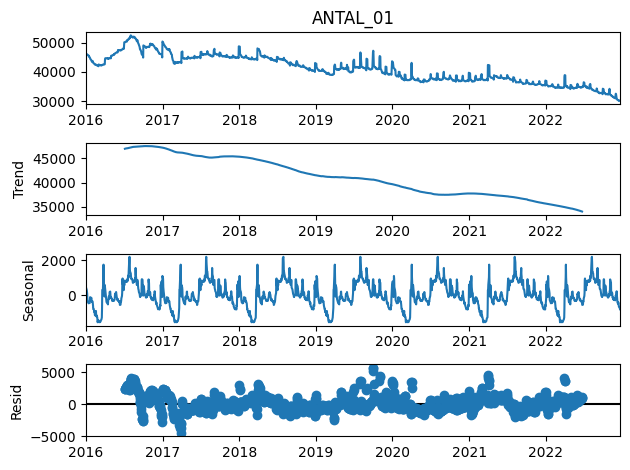

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['ANTAL_01'],model='additive', period=262)
ax=res.plot()
plt.show()

Augmented Dickey_Fuller (ADF) test that can be used to test for the presence of a unit root in the time series, which is a common indicator of non-stationarity

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df['ANTAL_01']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.441899
p-value: 0.902865
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Differencing data

<Axes: xlabel='DT'>

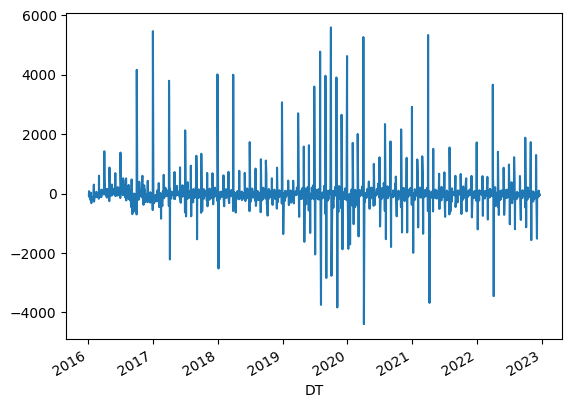

In [ ]:
df_copy = df
df_copy['ANTAL_01'] = df_copy['ANTAL_01'].astype(float) - df_copy['ANTAL_01'].astype(float).shift(1)
df_copy['ANTAL_01'].dropna().plot()

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df_copy['ANTAL_01'].dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.487130
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Data standardizing/normalizing

[['46084']
 ['46026']
 ['46108']
 ...
 ['30152']
 ['30121']
 ['30090']]
Mean: 40906.524202, StandardDeviation: 4750.513865


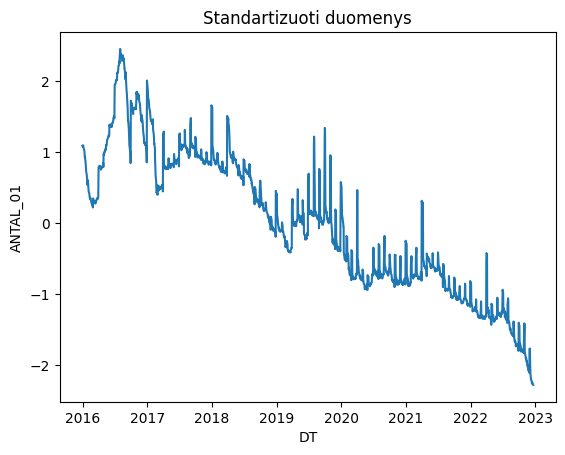

[1.089877]
[1.07766779]
[1.09492908]
[1.07114218]
[1.06251154]
[46084.]
[46026.]
[46108.]
[45995.]
[45954.]


In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = df.values
print(values)
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
df_normalized = pd.DataFrame(normalized, index=df.index, columns=df.columns)
# plot the normalized data
plt.plot(df_normalized)
plt.title('Standartizuoti duomenys')
plt.xlabel('DT')
plt.ylabel('ANTAL_01')
plt.show()
plt.show()
for i in range(5):
 print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
 print(inversed[i])